# Comparing numerical methods for exact marginal likelihood calculations 
I have 3 calculation methods that are inconsistent for low amounts of data and consistent for high amounts of data.

In summary, my function seems robust enough to work, but I can always check against these 2 other methods if I have strange results.


In [1]:
import numpy as np
from scipy import stats

import matplotlib.pylab as plt
%matplotlib inline

from time import time

import sys
sys.path.append('../')
from bayes_linear_regression import norm_inv_gamma as nig

from scipy.stats import invgamma

In [2]:
from itertools import combinations

## A polynomial model with decoys
### The true polynomial is of order 3

In [3]:
def gen_poly_model(n, a, b, c, A, B):
    sigma2 = invgamma.rvs(A, loc=0, scale=B, size=1) 
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma2), size=n)
    noise = np.reshape(noise, (n, 1))

    mu = n
    X = np.random.normal(loc=0, scale=1.5, size=n).reshape((n, 1))
    Y = a * X + b * X**2 + c * X**3 + noise

    return X, Y

In [4]:
# The polynomial parameters
a = -5
b = 3
c = 1
# The inverse gamma parameters
A = 1
B = 3

### N = 10 data points

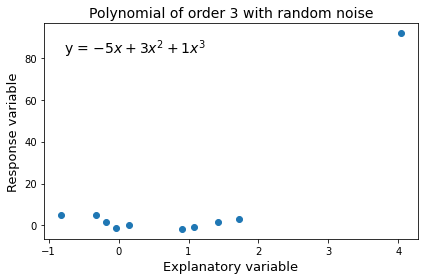

In [5]:
# The number of data points
n = 10
X, Y = gen_poly_model(n, a, b, c, A, B)

plt.scatter(X,Y)
plt.xlabel('Explanatory variable', fontsize=13)
plt.ylabel('Response variable', fontsize=13)
plt.title('Polynomial of order 3 with random noise', fontsize=14)

ymin = Y.min()
ymax = Y.max()
yr = ymax - ymin

xmin = X.min()
xmax = X.max()
xr = xmax - xmin

plt.text(xmin + 0.01*xr, ymin + 0.9*yr, s='y = ${0}x + {1}x^2 + {2}x^3$'.format(a, b, c), fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
powers = (1, 2, 3, 4, 5, 6)

lnmarglike_t = []
lnmarglike_scipy = []
lnmarglike_me = []

explanatory = X
for p in powers:
    if p != 1:
        explanatory = np.hstack((explanatory, X**p))
    # Set up the prior and get the posterior
    cov = np.eye(explanatory.shape[1])
    mu = np.zeros(shape=(explanatory.shape[1], 1))
    prior = nig.NormalInverseGamma(a=A, b=B, mu=mu, cov=cov)
    post = nig.PostNormalInverseGamma(prior, explanatory, Y)
    
    lnmarglike_me.append(nig._calc_log_marg_like(prior, post))
    lnmarglike_scipy.append(nig._calc_log_marg_like_multivart_scipy(prior, post))
    lnmarglike_t.append(nig._calc_log_marg_like_multivart(prior, post))

lnmarglike_me = np.array(lnmarglike_me)
lnmarglike_scipy = np.array(lnmarglike_scipy)
lnmarglike_t = np.array(lnmarglike_t)

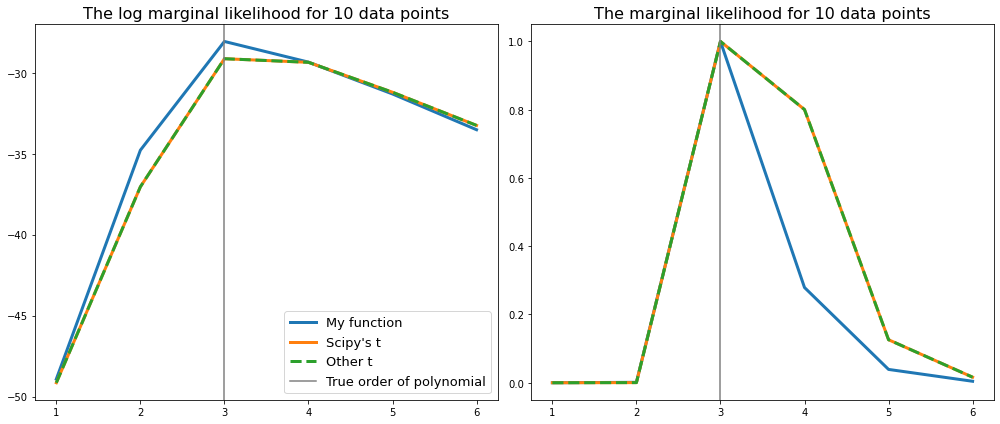

In [7]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(powers, lnmarglike_me, label='My function', lw=3)
ax[0].plot(powers, lnmarglike_scipy, label="Scipy's t", lw=3)
ax[0].plot(powers, lnmarglike_t, label="Other t", lw=3, ls='--')
ax[0].axvline(3, label='True order of polynomial', color='grey')

ax[0].legend(fontsize=13)
ax[0].set_title('The log marginal likelihood for {0} data points'.format(n), fontsize=16)

shifted_lnmarglike = lnmarglike_me - np.max(lnmarglike_me)
ax[1].plot(powers, np.exp(shifted_lnmarglike), label='My function', lw=3)

shifted_lnmarglike = lnmarglike_scipy - np.max(lnmarglike_scipy)
ax[1].plot(powers, np.exp(shifted_lnmarglike), label="Scipy's t", lw=3)

shifted_lnmarglike = lnmarglike_t - np.max(lnmarglike_t)
ax[1].plot(powers, np.exp(shifted_lnmarglike), label="Other t", lw=3, ls='--')
ax[1].set_title('The marginal likelihood for {0} data points'.format(n), fontsize=16)
ax[1].axvline(3, label='True order of polynomial', color='grey')

plt.tight_layout()
plt.show()

### N=100 data points

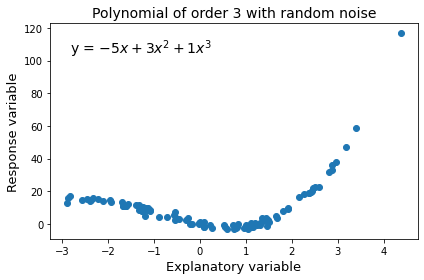

In [8]:
# The number of data points
n = 100
X, Y = gen_poly_model(n, a, b, c, A, B)

plt.scatter(X,Y)
plt.xlabel('Explanatory variable', fontsize=13)
plt.ylabel('Response variable', fontsize=13)
plt.title('Polynomial of order 3 with random noise', fontsize=14)

ymin = Y.min()
ymax = Y.max()
yr = ymax - ymin

xmin = X.min()
xmax = X.max()
xr = xmax - xmin

plt.text(xmin + 0.01*xr, ymin + 0.9*yr, s='y = ${0}x + {1}x^2 + {2}x^3$'.format(a, b, c), fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
powers = (1, 2, 3, 4, 5, 6)

lnmarglike_t = []
lnmarglike_scipy = []
lnmarglike_me = []

explanatory = X
for p in powers:
    if p != 1:
        explanatory = np.hstack((explanatory, X**p))
    # Set up the prior and get the posterior
    cov = np.eye(explanatory.shape[1])
    mu = np.zeros(shape=(explanatory.shape[1], 1))
    prior = nig.NormalInverseGamma(a=A, b=B, mu=mu, cov=cov)
    post = nig.PostNormalInverseGamma(prior, explanatory, Y)
    
    lnmarglike_me.append(nig._calc_log_marg_like(prior, post))
    lnmarglike_scipy.append(nig._calc_log_marg_like_multivart_scipy(prior, post))
    #lnmarglike_scipy.append(post.log_marg_like)
    lnmarglike_t.append(nig._calc_log_marg_like_multivart(prior, post))

lnmarglike_me = np.array(lnmarglike_me)
lnmarglike_scipy = np.array(lnmarglike_scipy)
lnmarglike_t = np.array(lnmarglike_t)

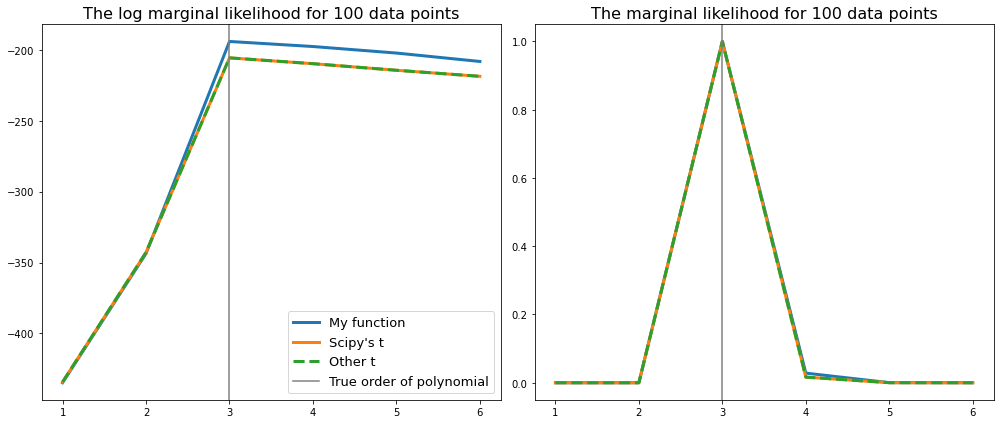

In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(powers, lnmarglike_me, label='My function', lw=3)
ax[0].plot(powers, lnmarglike_scipy, label="Scipy's t", lw=3)
ax[0].plot(powers, lnmarglike_t, label="Other t", lw=3, ls='--')
ax[0].axvline(3, label='True order of polynomial', color='grey')

ax[0].legend(fontsize=13)
ax[0].set_title('The log marginal likelihood for {0} data points'.format(n), fontsize=16)

shifted_lnmarglike = lnmarglike_me - np.max(lnmarglike_me)
ax[1].plot(powers, np.exp(shifted_lnmarglike), label='My function', lw=3)

shifted_lnmarglike = lnmarglike_scipy - np.max(lnmarglike_scipy)
ax[1].plot(powers, np.exp(shifted_lnmarglike), label="Scipy's t", lw=3)

shifted_lnmarglike = lnmarglike_t - np.max(lnmarglike_t)
ax[1].plot(powers, np.exp(shifted_lnmarglike), label="Other t", lw=3, ls='--')
ax[1].set_title('The marginal likelihood for {0} data points'.format(n), fontsize=16)
ax[1].axvline(3, label='True order of polynomial', color='grey')

plt.tight_layout()
plt.show()

## Linear model with decoy variables

In [11]:
A = 3
B = 30

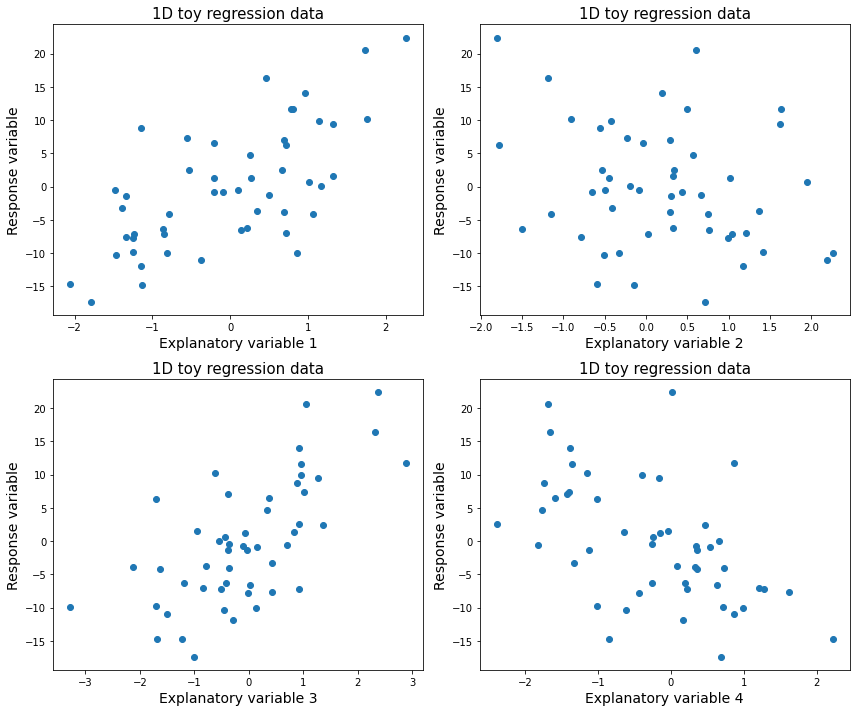

In [12]:
### 1. Generate a 1D toy regression problem by sampling from the prior
true_nvars = 4   # The number of variables, not including the intercept
factor = 1
cov = np.eye(true_nvars + 1) * factor
mu = np.zeros(shape=(true_nvars + 1, 1)) # nvars plus 1 because first 'mu' is the intercept

# Instantiate the model
prior = nig.NormalInverseGamma(a=A, b=B, mu=mu, cov=cov)

n = 50
# Explanatory variables are drawn from a standard Guassian
explanatory, response, params = nig.gen_toy_data(n, prior)

fig, axes = plt.subplots(2,2, figsize=(12, 10))
flat_axes = axes.flatten()

for i in range(true_nvars):
    ax = flat_axes[i]
    ax.scatter(explanatory[:, i + 1], response)
    ax.set_xlabel('Explanatory variable {0}'.format(i + 1), fontsize=14)
    ax.set_ylabel('Response variable', fontsize=14)
    ax.set_title('1D toy regression data', fontsize=15)

plt.tight_layout()
plt.show()

In [13]:
ndecoys = 3
decoys = np.random.normal(loc=0, scale=1, size=n * ndecoys).reshape((n, ndecoys))

all_explanatory = np.hstack((explanatory, decoys ))

indices = np.arange(1, all_explanatory.shape[-1]) # The indices of the non intercept variables

var_combs = list(range(1, all_explanatory.shape[-1]))
for i in range(2, all_explanatory.shape[-1]):
    var_combs.extend([a for a in combinations(indices, i)])

In [14]:
lnmarglike_t = []
lnmarglike_scipy = []
lnmarglike_me = []

numvars = []
for i, v in enumerate(var_combs):
    if type(v) == int:
        nvars = 1
    else:
        if list(v) == list(range(1, true_nvars + 1)):
            true_mode_ind = i
            print(v)
        nvars = len(v)   # The number of variables, not including the intercept
    prior_model = nig.NormalInverseGamma(a=A, b=B, mu=np.zeros(shape=(nvars + 1, 1)), cov=np.eye(nvars + 1)*factor )
    explain_model = all_explanatory[:, v].reshape(n, nvars)
    numvars.append(explain_model.shape[1]) 

    # Add back in the intercept
    explain_model = np.hstack((all_explanatory[:,0].reshape(n,1), explain_model))
    post_model = nig.PostNormalInverseGamma(prior_model, explain_model, response)
    
    lnmarglike_me.append(nig._calc_log_marg_like(prior_model, post_model))
    lnmarglike_scipy.append(nig._calc_log_marg_like_multivart_scipy(prior_model, post_model))
    lnmarglike_t.append(nig._calc_log_marg_like_multivart(prior_model, post_model))

lnmarglike_me = np.array(lnmarglike_me)
lnmarglike_scipy = np.array(lnmarglike_scipy)
lnmarglike_t = np.array(lnmarglike_t)

(1, 2, 3, 4)


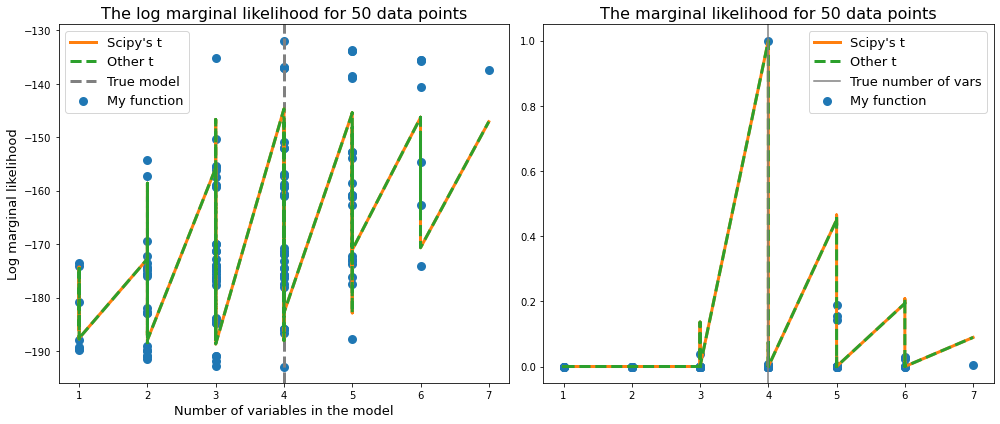

In [15]:
#condition_ent = nig.entropy_of_normal(params[0][0])
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].scatter(numvars, lnmarglike_me, label='My function', lw=3)
ax[0].plot(numvars, lnmarglike_scipy, label="Scipy's t", lw=3, color='C1')
ax[0].plot(numvars, lnmarglike_t, label="Other t", lw=3, ls='--', color='C2')

#plt.axhline(-condition_ent, color='k', lw=3, ls='--', label='Entropy', zorder=0)
ax[0].axvline(numvars[true_mode_ind], lw=3, color='grey',label='True model', zorder=1, ls='--')
ax[0].set_ylabel('Log marginal likelihood', fontsize=13)
ax[0].set_xlabel('Number of variables in the model', fontsize=13)
#ax[0].legend(fontsize=13)


ax[0].legend(fontsize=13)
ax[0].set_title('The log marginal likelihood for {0} data points'.format(n), fontsize=16)

shifted_lnmarglike = lnmarglike_scipy - np.max(lnmarglike_scipy)
ax[1].plot(numvars, np.exp(shifted_lnmarglike), label="Scipy's t", lw=3, color='C1')

shifted_lnmarglike = lnmarglike_t - np.max(lnmarglike_t)
ax[1].plot(numvars, np.exp(shifted_lnmarglike), label="Other t", lw=3, ls='--', color='C2')

shifted_lnmarglike = lnmarglike_me - np.max(lnmarglike_me)
ax[1].scatter(numvars, np.exp(shifted_lnmarglike), label='My function', lw=3)

ax[1].set_title('The marginal likelihood for {0} data points'.format(n), fontsize=16)
ax[1].axvline(true_nvars, label='True number of vars', color='grey')
ax[1].legend(fontsize=13)


plt.tight_layout()
plt.show()